## Early onset hearing impairment phenotype

## ICD10 codes f.41270

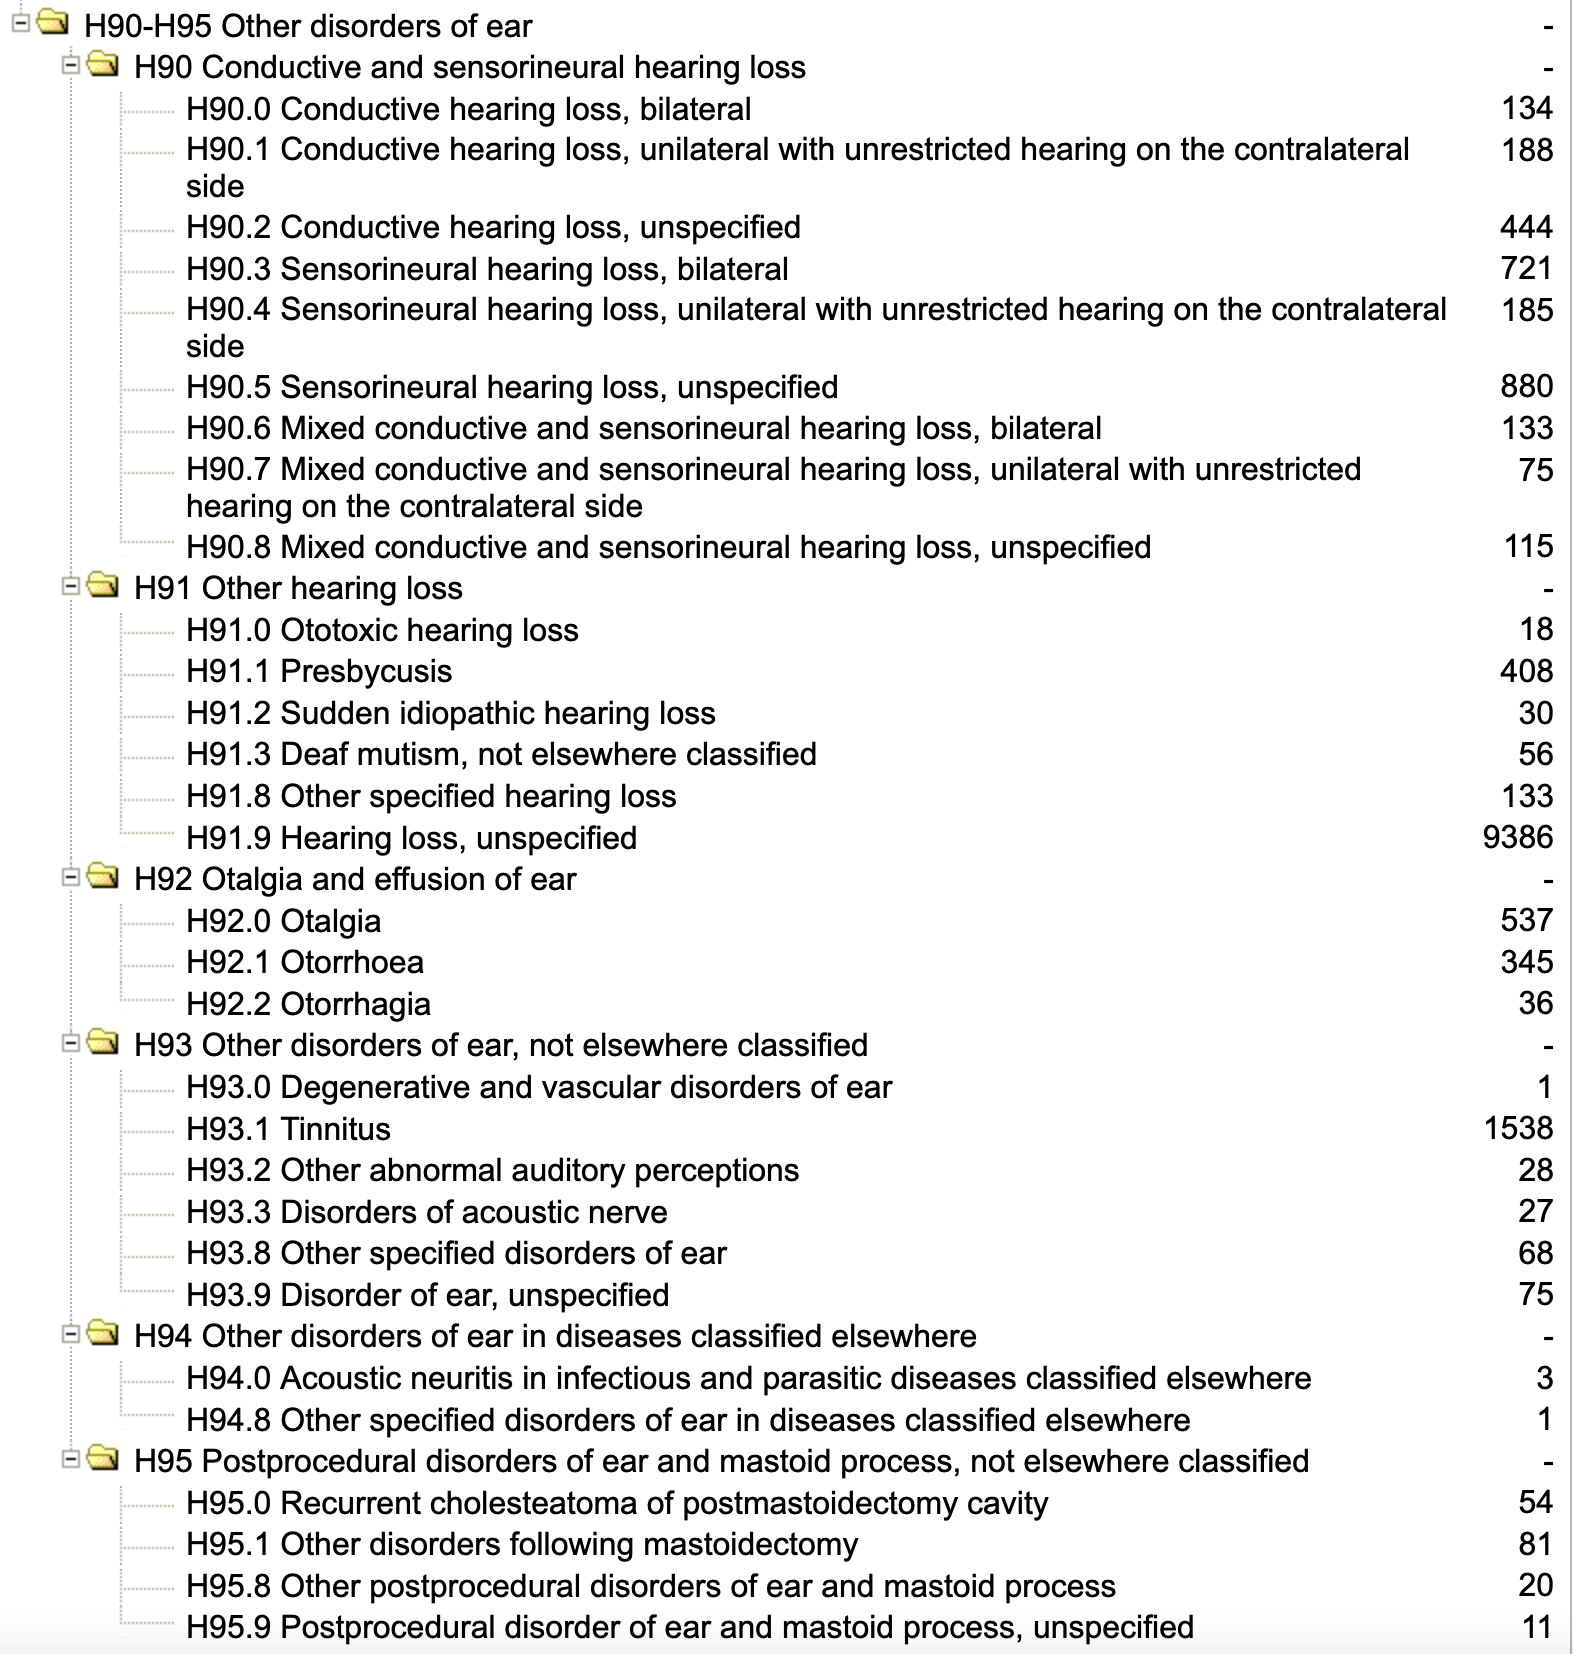

## ICD9 codes f.41271

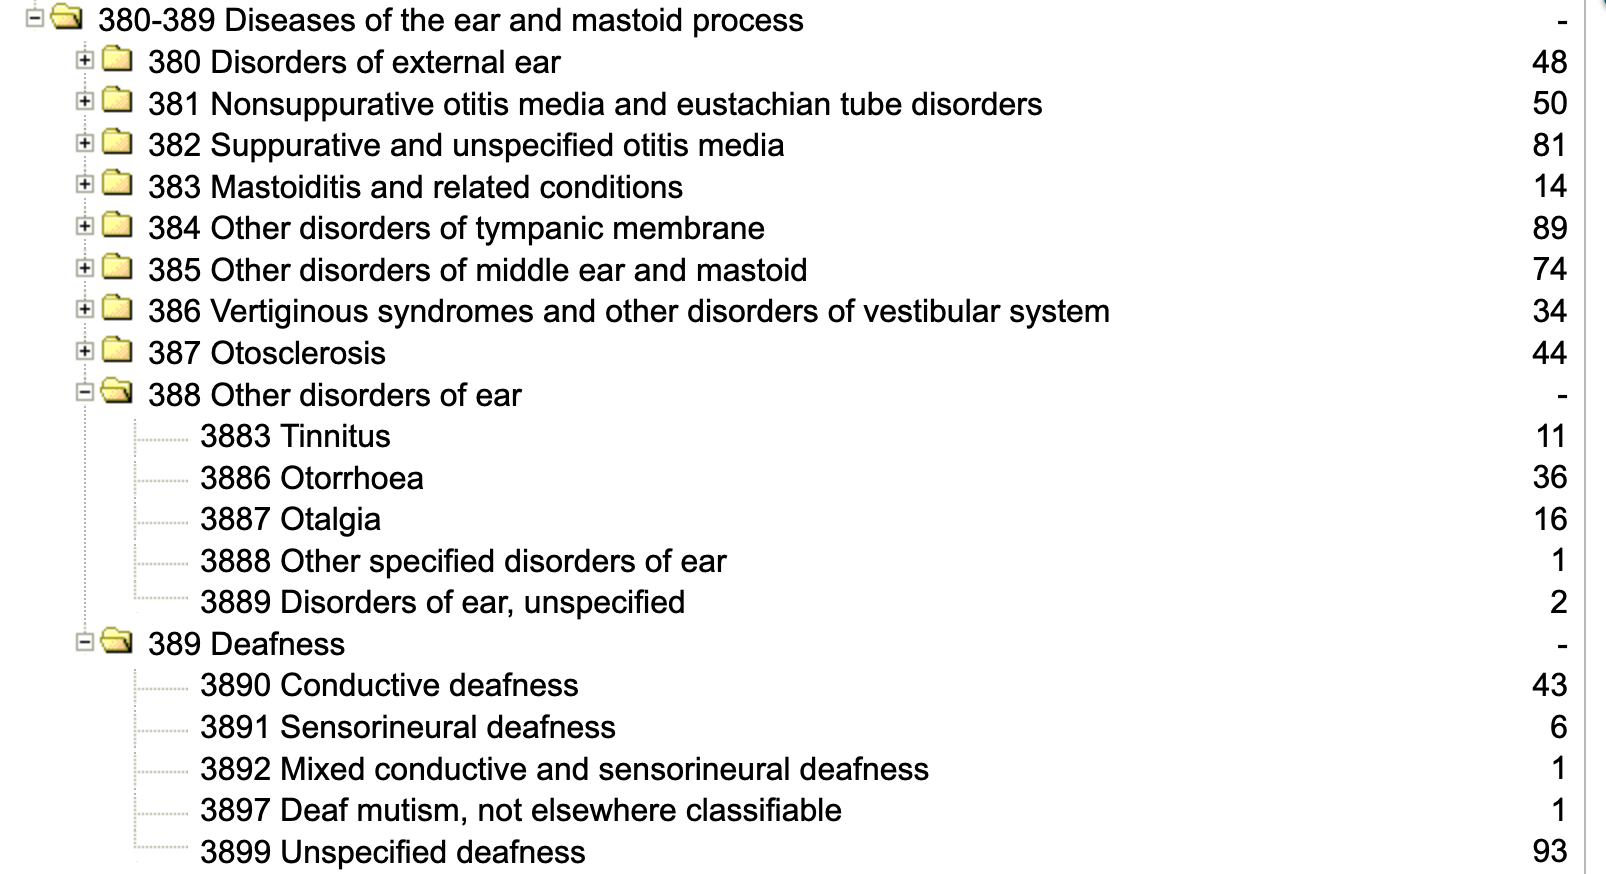

## Get the number of individuals from the following codes

## 1. For ICD 10 to be included in early onset hearing loss

ICD10 code | phenotype | # cases UKBB
--- | --- | ---
H90|Conductive and sensorineural hearing loss||
H900 | Conductive hearing loss, bilateral | 134
H901 | Conductive hearing loss, unilateral with unrestricted hearing on the contralateral side | 188
H902 | Conductive hearing loss, unspecified | 444
H903 | Sensorineural hearing loss, bilateral | 721
H904 | Sensorineural hearing loss, unilateral with unrestricted hearing on the contralateral side | 185
H905 | Sensorineural hearing loss, unspecified | 880
H906 | Mixed conductive and sensorineural hearing loss, bilateral | 133
H907 | Mixed conductive and sensorineural hearing loss, unilateral with unrestricted hearing on the contralateral side | 75
H908 | Mixed conductive and sensorineural hearing loss, unspecified | 115
H91 | Other hearing loss| 
H910 | Ototoxic hearing loss | 18
H911 | Presbycusis | 408
H912 | Sudden idiopathic hearing loss | 30
H913 | Deaf mutism, not elsewhere classified | 56
H918 | Other specified hearing loss | 133
H919 | Hearing loss, unspecified | 9386

## 2. For ICD 9 to be included in early onset hearing loss

ICD9 code | phenotype | # cases UKBB
--- | --- | ---
389 | Deafness |
3890 | Conductive deafness | 43
3891 | Sensorineural deafness | 6
3892 | Mixed conductive and sensorineural deafness | 1
3897 | Deaf mutism, not elsewhere classifiable | 1
3899 | Unspecified deafness | 93

In [1]:
#Load libraries
library(plyr)
library(tidyverse)
library(pander)
library(ggpubr)
library(rapportools)
library(ggplot2)
#Get working directory
getwd()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package

[1] "/gpfs/ysm/project/dewan/dc2325/UKBB_GWAS_dev/analysis/phenotypes"

In [2]:
#Set working directory
setwd('/home/dc2325/project/HI_UKBB/') #Yale's cluster
setwd('/mnt/mfs/statgen/UKBiobank/data/HI_UKBB') #Columbia's cluster

## Read exome data for extended white without removing outliers after PCA

In [3]:
#This file corresponds to the extended white without removing outliers after PCA
hi_geno <- read.csv("062421_UKBB_HI_exomes_189009ind.csv")

## Specify the codes to be filtered

In [5]:
a <- c('H900','H901', 'H902', 'H903', 'H904', 'H905', 'H906', 'H907', 'H908', 'H910', 'H911', 'H912', 'H913', 'H918', 'H919')

b <- c('389', '3890', '3891','3892', '3897', '3899')

#c <- c('1420', '1421', '1499', '1249','1247','1246', '1245', '1250', '1240', '1626', '1627','1491')

In [10]:
to_exclude <- hi_geno %>% 
  mutate(exclude = apply(select(hi_geno,starts_with("f.41270")),1,function(x) any(x %in% a))
  | apply(select(hi_geno,starts_with("f.41271")),1,function(x) any(x %in% b))
  ) %>% 
  filter(exclude=="TRUE")
nrow(to_exclude)

[1] 2221

## FIXME: 

Add to the code count of each of the ICD10 and 9 codes 

H900 10
H901 12

Retrieve the date of first diagnosis 
Date of first in-patient diagnosis - ICD10 - f.41280 paired with f.41270
Date of first in-patient diagnosis - ICD9 -  f.41281 paired with f.41271

Filter for EOHI individuals <18yo keep them
Filter for LOHI indiv >40yo keep them

Example: 
ind  f.41270.0.10 f.41280.0.10
1    H901  18

In [8]:
head(to_exclude)

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.131229.0.0,f.131230.0.0,f.131231.0.0,f.131232.0.0,f.131233.0.0,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,exclude
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000611,1000611,0,0,2,-9,Female,1953,2009-09-12,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
2,1001196,1001196,0,0,1,-9,Male,1949,2008-11-18,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
3,1002888,1002888,0,0,1,-9,Male,1940,2009-11-25,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
4,1003258,1003258,0,0,1,-9,Male,1938,2008-08-09,2013-02-14,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
5,1005172,1005172,0,0,2,-9,Female,1949,2009-06-23,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
6,1005264,1005264,0,0,1,-9,Male,1954,2010-02-17,NA,⋯,NA,NA,NA,NA,NA,1981-07-01,Self-report only,NA,NA,TRUE
